# 17.06 Data Exploration 2

Previously, in 17.05 Data Exploration 1, you saw how examining individual variables reveals useful insights.  In data science, many of the interesting insights are discovered when you analyze variables together.  For example, the comovement of two variables over time reflects a common factor that may affect these two variables, or one may affect the other.

Say that that you have data about a disease and a hospital's records.  If the average of people with respect to their likelihood of suffering from this disease differs significantly, then this might be a very important revelation as it implies age may play an important role for the prevention or treatment of the disease.

The analysis that incorporates two or more variables is called **multivariate analysis**, and in this notebook several multivariate techniques will be discussed.  In this notebook, you give some examples from the YouTube dataset and a new dataset called ["Students Performance in Exams"](https://www.kaggle.com/spscientist/students-performance-in-exams/home).  This dataset consists of information about some student backgrounds along with their exam results in math, reading, and writing.

First, you'll examine pairwise relationships in the data.  Technically, this is called **bivariate analysis** when you analyze only two variables together, but this is just a special case of multivariate analysis.  Think about the combinations of possible matchings in bivariate analysis with respect to the variable types.  Since you have two types of variables that are categorical and continuous, you have a total of three possible matchings (where order is unimportant): **continuous-continuous**, **continuous-categorical**, **categorical-categorical**.  Each combination requires analysis, and each will be individually discussed.

### Bivariate Analysis of Two Continuous Variables 

#### Scatter Plot 

One of the most informative way of looking at the relationship between two continuous variables is to draw a scatter plot (aka scattergram).  For example, if you see the first variable's values usually goes up when the second one goes up, this indicates a positive relationship.


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 

from scipy.stats.mstats import winsorize 
from sqlalchemy import create_engine 
from sqlalchemy.engine.url import URL

import warnings 

warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set(style="whitegrid")

In [2]:
kagle = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="youtube"
)

engine = create_engine(URL(**kagle), echo=True)

youtube_df = pd.read_sql_query("SELECT * FROM youtube", con=engine)

engine.dispose()

2020-01-01 11:37:54,923 INFO sqlalchemy.engine.base.Engine select version()
2020-01-01 11:37:54,930 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:37:55,038 INFO sqlalchemy.engine.base.Engine select current_schema()
2020-01-01 11:37:55,040 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:37:55,145 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-01-01 11:37:55,145 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:37:55,198 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-01-01 11:37:55,200 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:37:55,252 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2020-01-01 11:37:55,253 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:37:55,357 INFO sqlalchemy.engine.base.Engine SELECT * FROM youtube
2020-01-01 11:37:55,357 INFO sqlalchemy.engine.base.Engine {}


In [3]:
# Deal with the missing values
youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df["Grade"] = youtube_df["Grade"].apply(str.strip).replace("",np.nan)

youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

In [4]:
"""
    Apply a one-way winsorization to the highest end of the value distribution.  There are a lot of extreme values, so set the value of the outliers to the value of the 90th percentile.
"""
youtube_df["winsorized_uploads"] = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorize(youtube_df["Subscribers"], (0,0.10))
youtube_df["winsorized_views"] = winsorize(youtube_df["Video views"], (0,0.10))

for i in range(0,len(youtube_df["Grade"])):
    if pd.isnull(youtube_df["Grade"][i]):
        youtube_df["Grade"][i] = youtube_df["Grade"][i-1]

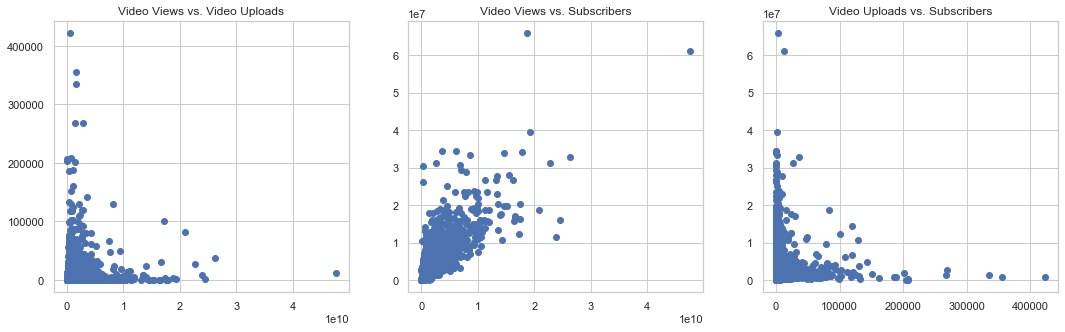

In [5]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(youtube_df["Video views"], youtube_df["Video Uploads"])
plt.title("Video Views vs. Video Uploads")

plt.subplot(1,3,2)
plt.scatter(youtube_df["Video views"], youtube_df["Subscribers"])
plt.title("Video Views vs. Subscribers")

plt.subplot(1,3,3)
plt.scatter(youtube_df["Video Uploads"], youtube_df["Subscribers"]) 
plt.title("Video Uploads vs. Subscribers")

plt.show();

In the second scatterplot, you see a positive relationship between the video views and the number of subscribers.  Now, take a look at the relationship between different pairs of student test scores.

In [6]:
"""
    Change gears and look at the relationship betweeen different pairs of student test scores.
"""
kagle2 = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="studentsperformance"
)

engine = create_engine(URL(**kagle2), echo=True)

student_df = pd.read_sql_query("SELECT * FROM studentsperformance", con=engine)

engine.dispose()

2020-01-01 11:40:44,225 INFO sqlalchemy.engine.base.Engine select version()
2020-01-01 11:40:44,228 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:40:44,325 INFO sqlalchemy.engine.base.Engine select current_schema()
2020-01-01 11:40:44,327 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:40:44,424 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-01-01 11:40:44,425 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:40:44,487 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-01-01 11:40:44,489 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:40:44,538 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2020-01-01 11:40:44,540 INFO sqlalchemy.engine.base.Engine {}
2020-01-01 11:40:44,636 INFO sqlalchemy.engine.base.Engine SELECT * FROM studentsperformance
2020-01-01 11:40:44,637 INFO sqlalchemy.engine.base.Engine {}


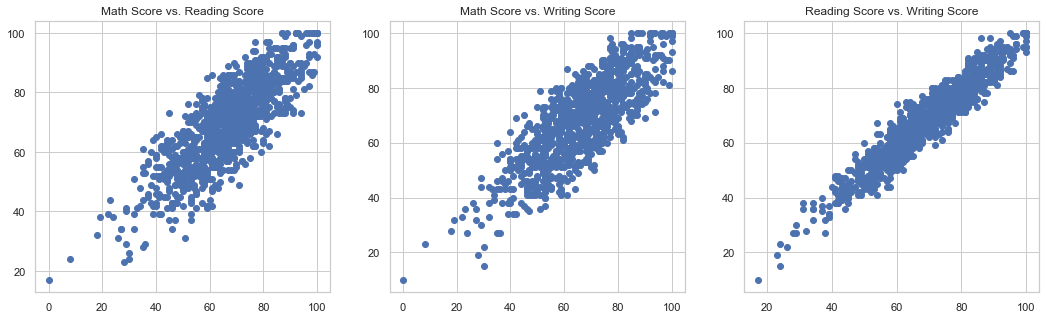

In [7]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(student_df["math score"], student_df["reading score"])
plt.title("Math Score vs. Reading Score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("Math Score vs. Writing Score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("Reading Score vs. Writing Score")

plt.show()

"""
    Note on outliers: There is also another type of outlier, called a two-dimensional outlier, that represents unusual combinations of values. If you look at the scatterplots below carefully, you may notice some of those unusual value pairs. To deal with these, you can apply one of the techniques explained in the outliers checkpoint.
""";

You see there are positive relationships between all the score types.

**<font color=red>\*A note on outliers</font>**:  Recall from 17.04 Data Cleaning 3: Outliers, you separately looked at extreme values for each variable.  There is also another type of outlier, called a _two-dimensional outlier_, that represents unusual _combinations_ of values.  If you look at the scatterplot above carefully, you may notice some of those unusual value pairs.  To deal with these you can apply one of the techniques explained int the outliers checkpoint.

### Correlation coefficient

Another informative statistic that measures the comovements of two continuous variables is the **correlation coefficient**.  The correlation coefficient (*r*) is a numeric representation of the linear relationship between two continuous variables.  Correlations range from -1 (a perfect negative relationship: as values in one variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (a perfect positive relationship: as values in one variable go up, the values in the other go up as well).

Notice that what you observed in the scatterplots is actually a visual representation of the correlations between variables.  Using a number that is indexed between -1 and 1 adds a layer of precision and ease of interpretation across items.

Pandas provides the `corr()` function to derive the correlation coefficients across all continuous features in a dataframe.  Apply the `corr()` function to both the YouTube and student performance datasets.


In [8]:
"""
    The correlation coefficient (r) is a numeric representation of the linear relationship between 2 continuous variables. Correlations range from -1 (a perfect negative relationship: as values in 1 variable go up, values in the other go down) to 0 (no relationship between the variables) to 1 (a perfect positive relationship: as values in 1 variable go up, values in the other go up as well).
"""
# Generate a correlation matrix for youtube_df
youtube_df.corr()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
Video Uploads,1.000000,0.011329,0.092423,0.473634,0.012593,0.134971
Subscribers,0.011329,1.000000,0.784449,0.082880,0.778046,0.626605
Video views,0.092423,0.784449,1.000000,0.219291,0.578920,0.700070
winsorized_uploads,0.473634,0.082880,0.219291,1.000000,0.097699,0.307744
winsorized_subscribers,0.012593,0.778046,0.578920,0.097699,1.000000,0.743256
winsorized_views,0.134971,0.626605,0.700070,0.307744,0.743256,1.000000


In [9]:
# Generate a correlation matrix for student_df
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


You can see the correlation between video views and subscribers is around 0.78 and that the correlation between the reading and writing scores is higher than any other combination.

Another convenient way to look at the correlations is to render the matrix as a heatmap.  This combines the effectiveness of visualization and the precision of statistics.  Such a technique is especially useful if you have a lot of variables in the dataset.  Lighter colors indicate a higher correlation between variables.  Draw correlation matrices for both datasets as heatmaps.


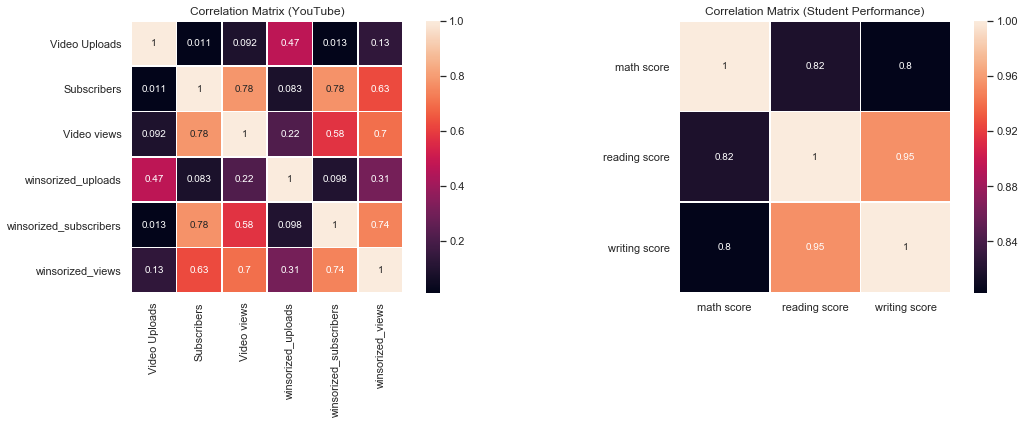

In [10]:
# View the correlation matricies as heatmaps
corrmat_youtube = youtube_df.corr()
corrmat_student = student_df.corr()

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(corrmat_youtube, square=True, annot=True, linewidths=0.5)
plt.title("Correlation Matrix (YouTube)")
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
# plt.yticks(rotation=360)

plt.subplot(1,2,2)
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=0.5)
plt.title("Correlation Matrix (Student Performance)")
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation=360)

plt.show();

### Bivariate Analysis of a Continuous-Categorical Pair 

When you analyze a continuous and a categorical variable pair, you usually look at some metric of the continuous variable for each value of the categorical variable.  If you observe different values across categories, then this implies the categorical variable has some important information regarding the continuous variable.

One way to look at this is to use Pandas' `groupby()` function where you use the categorical as the grouping variable.  After calling this function you can call some aggregation function like `mean()` or `count()` to derive metrics for the continuous variable by group.  Do this in the YouTube dataset using the _Grade_ variable as the categorical variable.


In [11]:
"""
    Bivariate analysis of a continuous-categorical pair:  When you analyze a continuous and a categorical variable pair, you usually look at some metric of the continuous variable for each value of the categorical value.  If you observe different values accross categories, then this implies the categorical variable has some important information regarding the continuous variable.
"""
# Derive averages by group
youtube_df.groupby("Grade").mean()

,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views
Grade,,,,,,
A,5353.923340,4.931878e+06,2.356715e+09,1675.311890,3398754.5,1.447002e+09
A+,16547.927734,1.150483e+07,6.053121e+09,2729.877930,5061679.0,2.088445e+09
A++,37450.699219,2.228176e+07,2.119909e+10,4673.700195,5590006.0,2.468241e+09
A-,4136.514648,2.784051e+06,1.041149e+09,1319.476562,2329109.5,8.810693e+08
B+,2987.168457,1.620060e+06,5.259158e+08,1120.130737,1513429.0,5.085668e+08


As you can see, there are substantial differences in the means of the variables across grade groups.  Instead of looking at a single metric like `mean()`, you could also call the `describe()` function after groupby().  Although useful, it can be tedious to analyze the resulting table for datasets containing many continuous variables.

Visualization can also help analyze continuous and categorical variable pairs.  You can use box, bar, or other plots to visualize the differences of the continuous variable across the groups of the categorical variable.  Start with bar plots:


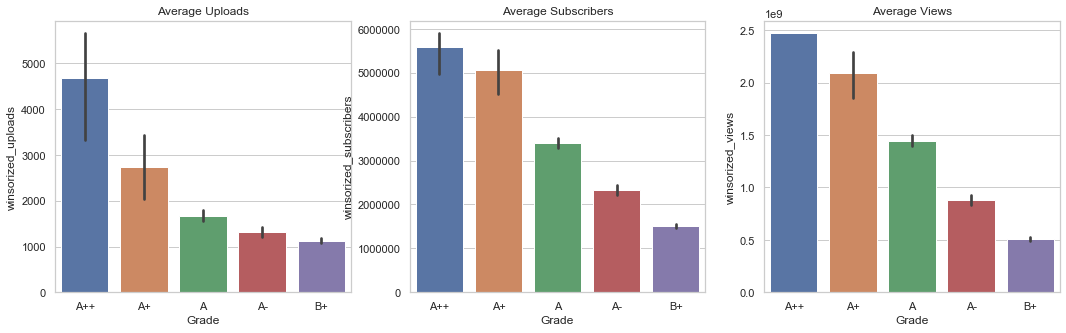

In [12]:
"""
    You can also use visualization to analyze continuous and categorical variable pairs.  
"""
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_uploads"])
plt.title("Average Uploads")

plt.subplot(1,3,2)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_subscribers"])
plt.title("Average Subscribers")

plt.subplot(1,3,3)
sns.barplot(youtube_df["Grade"], youtube_df["winsorized_views"])
plt.title("Average Views")

plt.show();

As you can see, averages decrease as the grade lowers.  **However, visualizing differences is not a formal way of stating that there are significant differences across categories!**  For this, you need to use a proper statistical test, such as a t-test or ANOVA.  Use these tests to learn whether the differences are statistically significant:

In [13]:
"""
    Visualizing differences is not a formal way of stating that there are signifigant differences across categories.  For that you need to use a statistical test such as a t-test or ANOVA.
"""
# Use a t-test to determine statistical signifigance
grades = youtube_df["Grade"].unique()
grouped_df = youtube_df.groupby("Grade")
for var in ["winsorized_uploads", "winsorized_subscribers", "winsorized_views"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0,len(grades)):
        for j in range(i+1, len(grades)):
            print(f"t-test between groups {grades[i]} and {grades[j]}")
            print(stats.ttest_ind(
                youtube_df[youtube_df["Grade"]==grades[i]][var], 
                youtube_df[youtube_df["Grade"]==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: winsorized_uploads
------------------------------------------------
t-test between groups A++ and A+
Ttest_indResult(statistic=2.3701079407396466, pvalue=0.021763510628877547)
t-test between groups A++ and A
Ttest_indResult(statistic=4.635430579419143, pvalue=4.046912486918512e-06)
t-test between groups A++ and A-
Ttest_indResult(statistic=5.849570829755956, pvalue=6.610430711945347e-09)
t-test between groups A++ and B+
Ttest_indResult(statistic=6.895263475627788, pvalue=6.542432119894545e-12)
t-test between groups A+ and A
Ttest_indResult(statistic=3.226986347537072, pvalue=0.0012914866839059097)
t-test between groups A+ and A-
Ttest_indResult(statistic=4.847071421048167, pvalue=1.4393742004398387e-06)
t-test between groups A+ and B+
Ttest_indResult(statistic=6.2504538443070645, pvalue=4.672660044879273e-10)
t-test between groups A and A-
Ttest_indResult(statistic=4.134406909072197, pvalue=3.7067387370056777e-0

### Bivariate Analysis of Two Categorical Variables.

The last combination remaining is the pair of two categorical variables.  Since categorical variables take a limited number of different values by definition, the most common technique us is the observation count of all value pairs.  The pandas `crosstab()` function does this for you.  Use it on the students performance dataset:

In [14]:
# Print the first few observations
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# Create a crosstab: gender by race/ethnicity
count_table = pd.crosstab(student_df["gender"], student_df["race/ethnicity"])
count_table

race/ethnicity,group A,group B,group C,group D,group E
gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


As you have seen, a visualization can help emphasize the differences. A bar plot with the height of each bar indicating the number of datapoints in each combination of variables conveys the crosstab's information:

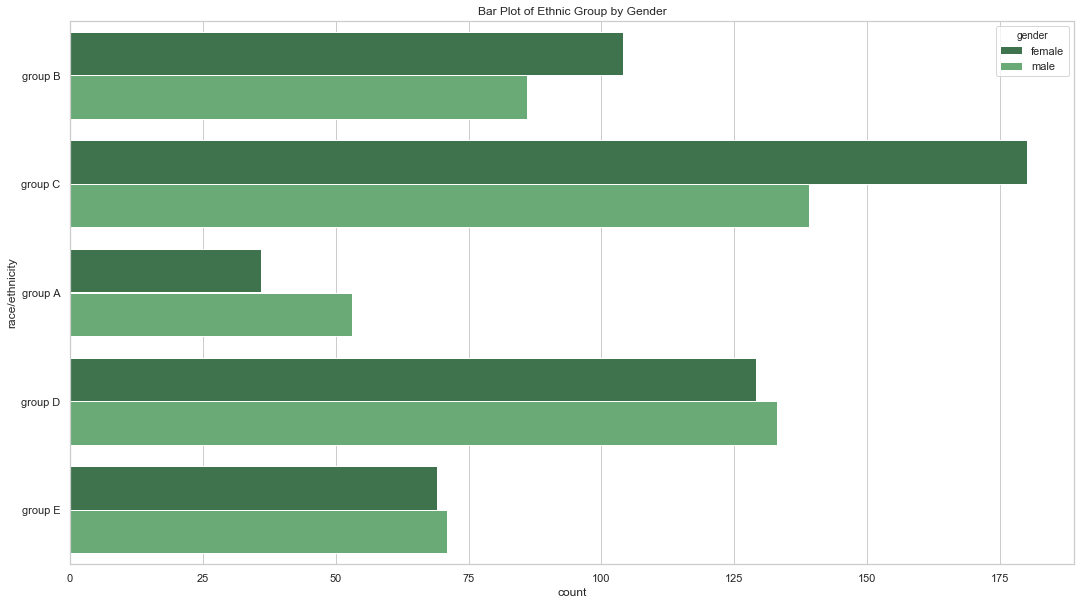

In [16]:
"""
    Visualize the count_table with a bar plot to help visualize the differences.  The bar plot uses the height of each bar to indicate and number of datapoints in each combination of the variables.
"""
plt.figure(figsize=(18,10))

sns.countplot(y="race/ethnicity", hue="gender", data=student_df, palette="Greens_d")
plt.title("Bar Plot of Ethnic Group by Gender")

plt.show()

As a reminder, don't forget the differences you see above should be checked using formal statistical tests. For this purpose, we can use the Chi-squared test. It indicates whether one combination of variables is significantly different than the rest:

In [17]:
"""
    Buttress the visualization above with a statistical test.  Use a Chi-squared test to indicate wether one combination of variables is significantly different than the others.

    The test will return a chi-square test statistic and a p-value.  Like the t-test, the chi-square is compared against a distribution (the chi-squar distribution) to determine wether the group size differences are large enough to reflect differences in the population.

    A note on small groups: Similar to how unusual two-dimensional datapoints could skew our analysis, groups with very small variances relative to other groups and groups with a very small number of observations can also mislead us. Hence, we should keep in mind interpreting the differences for small groups should be done cautiously.    
"""
print(stats.chisquare(count_table, axis=None))

# The result below points to a statistically signifigant test

Power_divergenceResult(statistic=181.70000000000002, pvalue=2.237210012745866e-34)


### Putting the Target at the Center

Throughout this notebook the discussion has been general and there was no focus on a single variable.  However, in a real-life data science project you will put special emphasis on a single variable.  This single most important variable is the one you try to understand and explain.  This variable is called the **target** or **outcome** variable.

Consider the YouTube dataset.  Say the goal is to predict the video views for a channel, as this will lead you guess how much money a channel makes from YouTube.  In this case, the target variable becomes the _Video views_.  You want to understand whether the other variables in the dataset have some information to help predict the number of views.  In this example, the target variable is continuous and in the bivariate analysis, you can look at the correlation coefficients of the _Video views_ with respect to other continuous variables to get a sense of how much other variables are related with the target.  If the target were a categorical variable, then you would apply other techniques to explore the relationship of the target to the other variables.  **Hence, the target variable should be located at the center of the exploratory data analysis**.

By no means is the claim being made that any multivariate analysis should include _only_ the target variable.  Knowing the relationships between the variables other than the target variable is also a useful insight.  As you will see in the notebook for 17.07 Feature Engineering 1: From Variables to Features, one objective of a data science project is to feed your model as few variables as possible while losing as little information as possible.  Of course, this is a trade-off, and you strike a balance by detecting features that are least useful in the presence of the other features.

**<font color=red>\*A note on the number of targets</font>: Although in a majority of data science projects will only have a single target, in some cases having multiple targets is also possible.  Here, you simply make a note of it without going any further as those cases are rare and usually require advanced techniques that are beyond the scope of the bootcamp.


## Assignment

In [2]:
kagle3 = dict(
    drivername="postgresql",
    username="dsbc_student",
    password="7*.8G9QH21",
    host="142.93.121.174",
    port="5432",
    database="studentsperformance"
)

engine = create_engine(URL(**kagle3), echo=True)

student2_df = pd.read_sql_query("SELECT * FROM studentsperformance", con=engine)

engine.dispose()

2019-11-22 08:23:48,981 INFO sqlalchemy.engine.base.Engine select version()
2019-11-22 08:23:48,983 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,089 INFO sqlalchemy.engine.base.Engine select current_schema()
2019-11-22 08:23:49,092 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,199 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-22 08:23:49,201 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,255 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-22 08:23:49,258 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,313 INFO sqlalchemy.engine.base.Engine show standard_conforming_strings
2019-11-22 08:23:49,316 INFO sqlalchemy.engine.base.Engine {}
2019-11-22 08:23:49,421 INFO sqlalchemy.engine.base.Engine SELECT * FROM studentsperformance
2019-11-22 08:23:49,425 INFO sqlalchemy.engine.base.Engine {}


### _1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?_

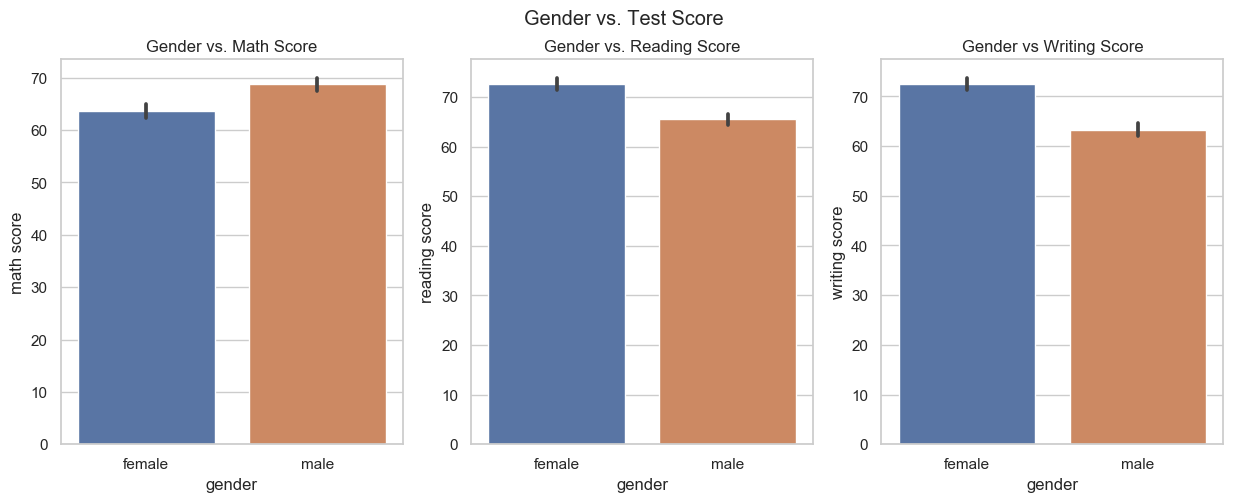

In [19]:
# Plotting Gender vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["gender"], student2_df["math score"])
plt.title("Gender vs. Math Score")

plt.subplot(1,3,2)
sns.barplot(student2_df["gender"], student2_df["reading score"])
plt.title("Gender vs. Reading Score")

plt.subplot(1,3,3)
sns.barplot(student2_df["gender"], student2_df["writing score"])
plt.title("Gender vs Writing Score")

plt.suptitle("Gender vs. Test Score")

plt.show();

In [4]:
"""
    This is a bivariate analysis of three categorical variables: gender, ethnicity, and parental level of education vs. the student scores in math, reading, and writing
"""
student2_df.groupby("gender").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [30]:
gender = student2_df["gender"].unique()
gender_grouped_df = student2_df.groupby("gender")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(gender)):
        for j in range(i+1, len(gender)):
            print(f"t-test between groups {gender[i]} and {gender[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["gender"]==gender[i]][category],
                student2_df[student2_df["gender"]==gender[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups female and male
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups female and male
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups female and male
Ttest_indResult(statistic=9.97955791000

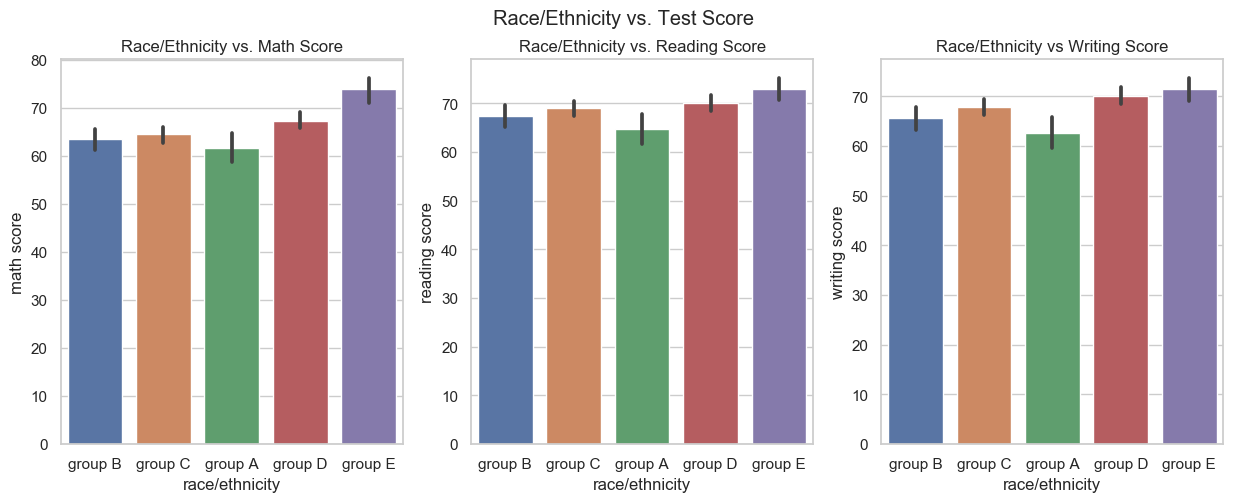

In [18]:
# Visualizing Race/Ethnicity vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["race/ethnicity"], student2_df["math score"])
plt.title("Race/Ethnicity vs. Math Score")

plt.subplot(1,3,2)
sns.barplot(student2_df["race/ethnicity"], student2_df["reading score"])
plt.title("Race/Ethnicity vs. Reading Score")

plt.subplot(1,3,3)
sns.barplot(student2_df["race/ethnicity"], student2_df["writing score"])
plt.title("Race/Ethnicity vs Writing Score")

plt.suptitle("Race/Ethnicity vs. Test Score")

plt.show();

In [10]:
student2_df.groupby("race/ethnicity").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [29]:
race_ethnicity = student2_df["race/ethnicity"].unique()
race_ethnicity_grouped_df = student2_df.groupby("race/ethnicity")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(race_ethnicity)):
        for j in range(i+1, len(race_ethnicity)):
            print(f"t-test between groups {race_ethnicity[i]} and {race_ethnicity[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["race/ethnicity"]==race_ethnicity[i]][category],
                student2_df[student2_df["race/ethnicity"]==race_ethnicity[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups group B and group C
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
                                                                                                                 
t-test between groups group B and group A
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
                                                                                                                 
t-test between groups group B and group D
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
                                                                                                                 
t-test between groups group B and group E
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
                                       

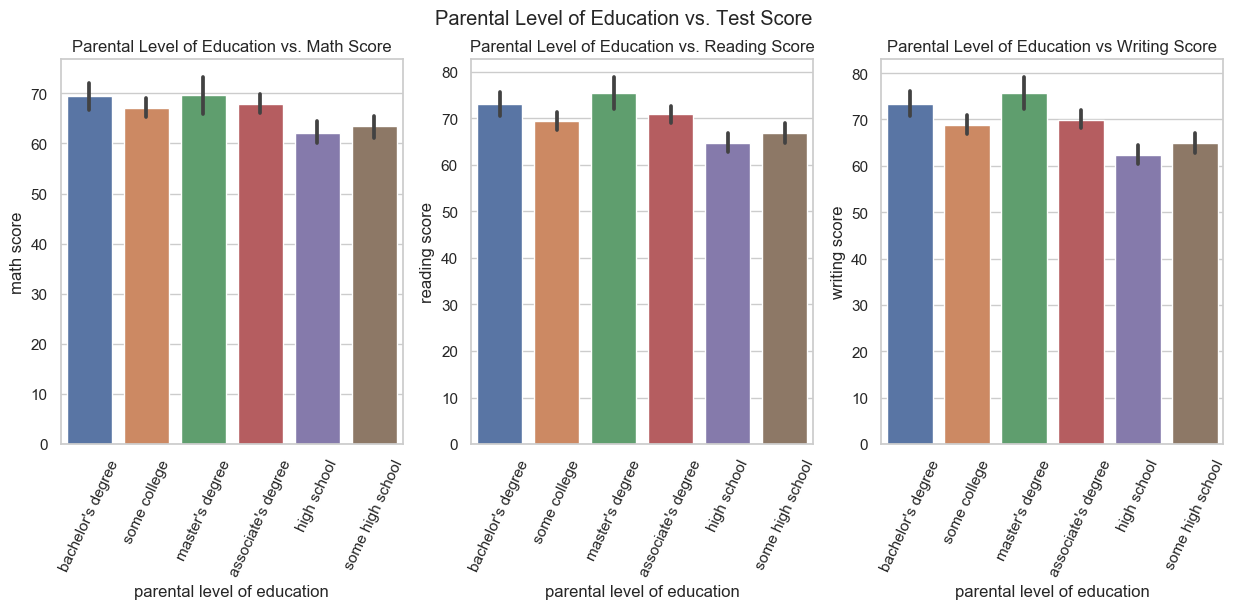

In [17]:
# Visualizing Parental Level of Education vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["parental level of education"], student2_df["math score"])
plt.title("Parental Level of Education vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["parental level of education"], student2_df["reading score"])
plt.title("Parental Level of Education vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["parental level of education"], student2_df["writing score"])
plt.title("Parental Level of Education vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Parental Level of Education vs. Test Score")

plt.show();

In [16]:
student2_df.groupby("parental level of education").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [28]:
parental_ed = student2_df["parental level of education"].unique()
parental_ed_grouped_df = student2_df.groupby("parental level of education")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(parental_ed)):
        for j in range(i+1, len(parental_ed)):
            print(f"t-test between groups {parental_ed[i]} and {parental_ed[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["parental level of education"]==parental_ed[i]][category],
                student2_df[student2_df["parental level of education"]==parental_ed[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups bachelor's degree and some college
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
                                                                                                                 
t-test between groups bachelor's degree and master's degree
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
                                                                                                                 
t-test between groups bachelor's degree and associate's degree
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
                                                                                                                 
t-test between groups bachelor's degree and high school
Ttest_indResult(statistic=4.236143622484822, 

#### _Conclusions_
Gender appears to have statistically significant impact regarding the reading score.  While the math and writing scores do not have the statistical relationship.  Race and Ethnicity as well as Parental Education Achievement have statistically significant relationships to Test Scores.


### _2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?_

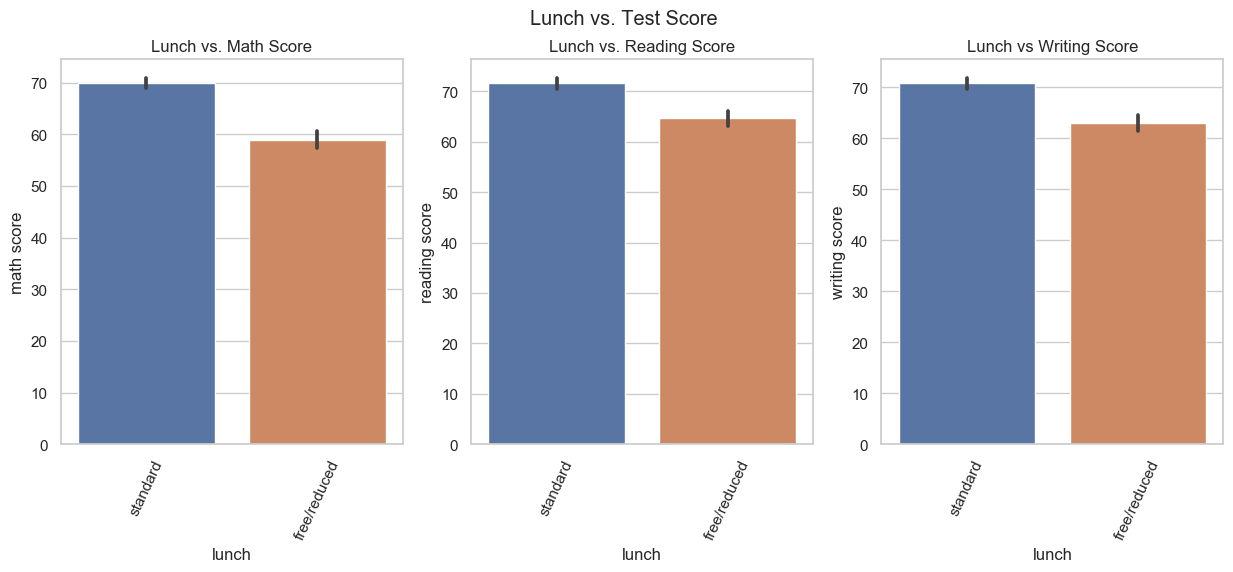

In [36]:
# Visualizing Lunch vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["lunch"], student2_df["math score"])
plt.title("Lunch vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["lunch"], student2_df["reading score"])
plt.title("Lunch vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["lunch"], student2_df["writing score"])
plt.title("Lunch vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Lunch vs. Test Score")

plt.show();

In [37]:
student2_df.groupby("lunch").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [39]:
lunch = student2_df["lunch"].unique()
lunch_grouped_df = student2_df.groupby("lunch")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(lunch)):
        for j in range(i+1, len(lunch)):
            print(f"t-test between groups {lunch[i]} and {lunch[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["lunch"]==lunch[i]][category],
                student2_df[student2_df["lunch"]==lunch[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups standard and free/reduced
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups standard and free/reduced
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups standard and free/reduced
Ttest_i

#### _Conclusions_
Lunches do not appear to have statistical relevance to Test Scores.


### _3. Does the test preparation course seem to have an effect on the exam performances?_

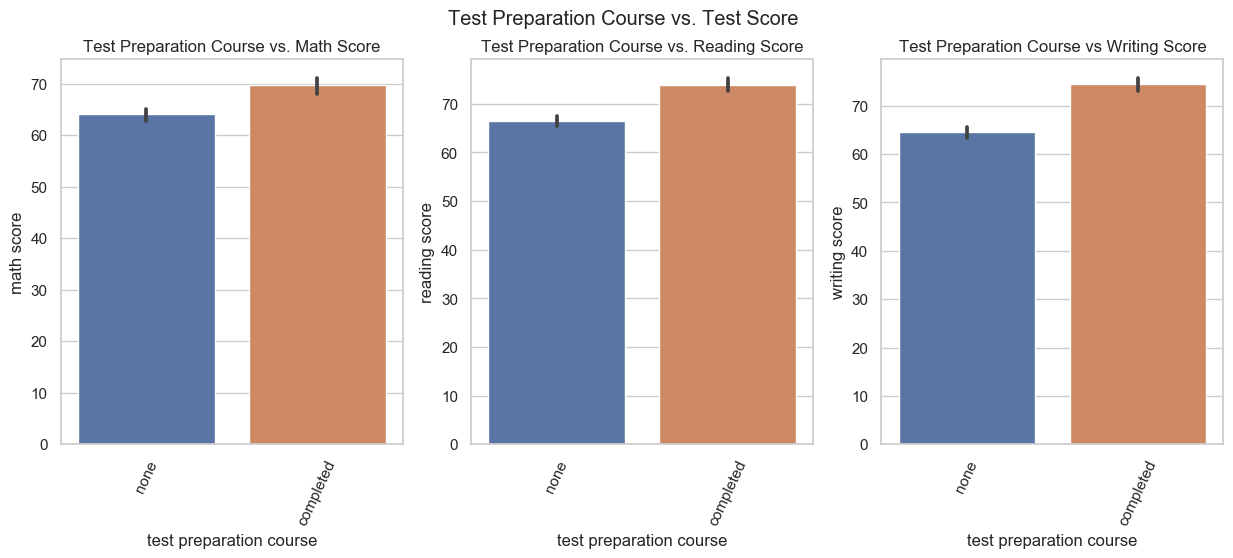

In [42]:
# Visualizing Test Preparation Course vs. Test Scores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(student2_df["test preparation course"], student2_df["math score"])
plt.title("Test Preparation Course vs. Math Score")
plt.xticks(rotation=65)

plt.subplot(1,3,2)
sns.barplot(student2_df["test preparation course"], student2_df["reading score"])
plt.title("Test Preparation Course vs. Reading Score")
plt.xticks(rotation=65)

plt.subplot(1,3,3)
sns.barplot(student2_df["test preparation course"], student2_df["writing score"])
plt.title("Test Preparation Course vs Writing Score")
plt.xticks(rotation=65)

plt.suptitle("Test Preparation Course vs. Test Score")

plt.show();

In [43]:
student2_df.groupby("test preparation course").mean()[["math score","reading score","writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [44]:
test_prep = student2_df["test preparation course"].unique()
test_prep_grouped_df = student2_df.groupby("test preparation course")
categories = ["math score","reading score","writing score"]
for category in categories:
    print("-" * (len(max(categories, key=len))+100))
    print(f"Comparisons for variable: {category} ::")
    for i in range(0,len(test_prep)):
        for j in range(i+1, len(test_prep)):
            print(f"t-test between groups {test_prep[i]} and {test_prep[j]}")
            print(stats.ttest_ind(
                student2_df[student2_df["test preparation course"]==test_prep[i]][category],
                student2_df[student2_df["test preparation course"]==test_prep[j]][category]
            ))
            print(" " * (len(max(categories, key=len))+100))
    print("=" * (len(max(categories, key=len))+100))

-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: math score ::
t-test between groups none and completed
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: reading score ::
t-test between groups none and completed
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
                                                                                                                 
-----------------------------------------------------------------------------------------------------------------
Comparisons for variable: writing score ::
t-test between groups none and completed
Ttest_indResult(statistic=-1

#### _Conclusions_
Test Preparation Courses have a statistically significant relationship to Test Scores. 

### _4. Which 2 exam scores are most correlated with each other?_

math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


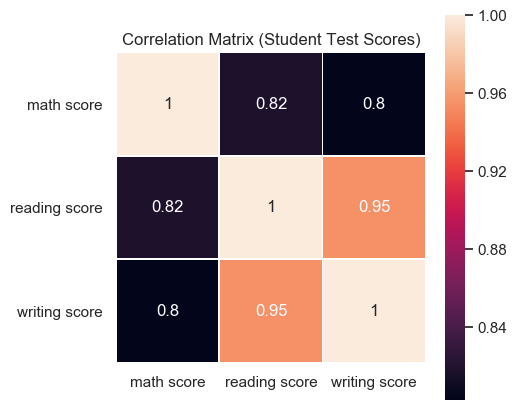

In [75]:
# Look for correlations in the student2 dataframe
test_corr = student2_df.corr()

print(test_corr)

plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
sns.heatmap(test_corr, square=True, annot=True, linewidths=0.5)
# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation=360)

plt.title("Correlation Matrix (Student Test Scores)")

plt.show();

#### _Conclusions_
Reading and Writing Scores are the most tightly correlated.